In [78]:
from scipy.integrate import odeint
import plotly.graph_objects as go 
from scipy.integrate import quad, solve_ivp
from scipy import integrate
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_excel('C:/Users/mathe/Documents/matheus/zebra/Equipe_DEV/Equipe-Devs/Estruturas/dados.xlsx')
df.head()

,Deformação,Tensão
0,1.000000e-15,1.000000e-15
1,5.150000e-05,9.555556e+03
2,7.040000e-05,3.100000e+04
3,8.970000e-05,5.388889e+04
4,1.085000e-04,7.911111e+04


## Encontrando o polinomial de melhor grau

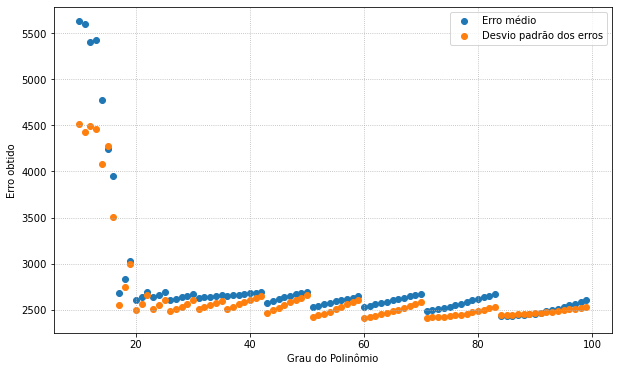

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(ylabel='Erro obtido', xlabel='Grau do Polinômio')
std, mean, x = [], [], []

for i in range(10, 100):
    pol = zb.fit(df['Deformação'], df['Tensão'], i)  
    #Pegando a média e os desvios padrão de cada aproximação
    mean.append(abs(df['Tensão'] - pol(df['Deformação'])).mean()) 
    std.append(abs(df['Tensão'] - pol(df['Deformação'])).std()) 
    x.append(i)

ax.scatter(x, mean, label='Erro médio')
ax.scatter(x, std, label='Desvio padrão dos erros')
ax.grid(ls='dotted')
ax.legend()

In [81]:
# Decidimos que  grau 20 oferece um bom resultado
pol = zb.fit(df['Deformação'], df['Tensão'], 20)   
#p = np.poly1d(list(pol), variable='x')
#print(p)

## Plotando os resultados e comparando

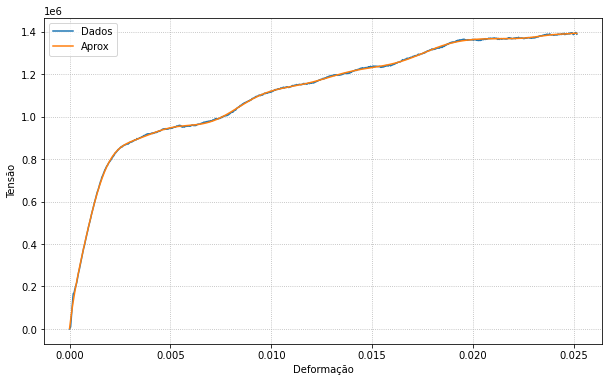

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(ylabel='Tensão', xlabel='Deformação')
ax.plot(df['Deformação'], df['Tensão'], label='Dados')
ax.plot(df['Deformação'], pol(df['Deformação']), label='Aprox')
ax.grid(ls='dotted')
ax.legend()

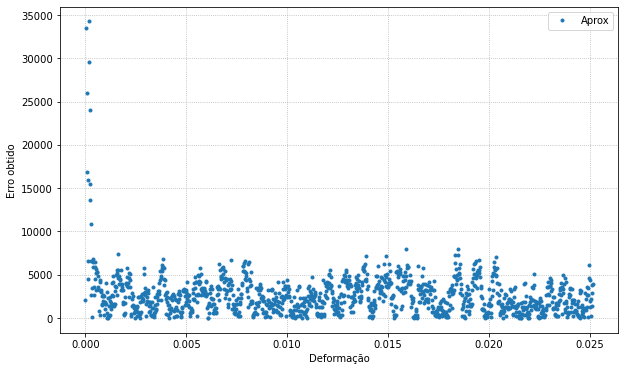

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(ylabel='Erro obtido', xlabel='Deformação')
ax.plot(df['Deformação'], abs(df['Tensão'] - pol(df['Deformação'])), 
            'o', markersize=3,label='Aprox')
ax.grid(ls='dotted')
ax.legend()

In [105]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x =df['Deformação'], y = pol(df['Deformação']) ))

In [85]:
# Criando um objeto da tabela do excel e aderindo as colunas às variáveis ''X'' e ''Y''
s = pd.read_excel('C:/Users/mathe/Documents/matheus/zebra/Equipe_DEV/Equipe-Devs/Estruturas/dados.xlsx')
X = (s['Deformação'])
Y = (s['Tensão']) 
# Comparando os coeficientes angulares dos pontos
var_reta=[0]
coef_ang = 0  
while True:
    for n in range(100): 
        coef_ang = (Y[n+1]- Y[n])/(X[n+1]-X[n]) 
        var_reta.append(coef_ang) 
    if var_reta[n+1]>0.01*var_reta[n]: 
        break
print(coef_ang)


178471758.9733069


In [111]:
v = pd.read_excel('C:/Users/mathe/Documents/matheus/zebra/Equipe_DEV/Equipe-Devs/Estruturas/dados.xlsx')
val_1 = (v['Deformação'])
val_2 = (v['Tensão'])

coef=[]

for i in range (201):
    a = (val_2[i]-val_2[i+1])/(val_1[i]-val_1[i+1])
    coef.append(a)

false = [0]
verd = []
p=0

while p != 200:
    if (coef[p] - coef[p+1]) < ((1/100) * false[p]):
        false.append(coef[p])
    else:
        verd.append(coef[p])
        break
    p += 1
 

verd

[1341607971.8595183]

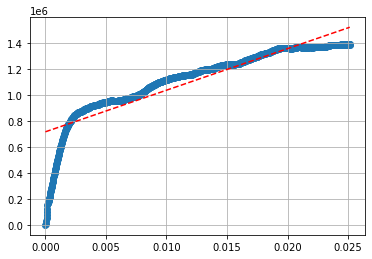

In [87]:

z = np.polyfit(val_1, val_2, 1)
p = np.poly1d(z)

fig, ax = plt.subplots()
ax.scatter(val_1,val_2, )
ax.plot(val_1,p(val_1),"r--")
ax.grid()

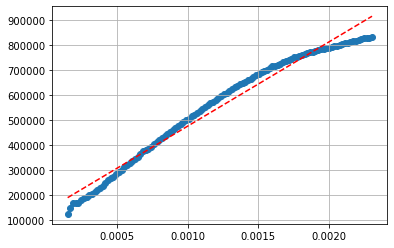

In [88]:
t = pd.read_excel('C:/Users/mathe/Documents/matheus/zebra/Equipe_DEV/teste.xlsx')
x = t['Deformação']
y = t['Tensão']

z = np.polyfit(x,y, 1)
p = np.poly1d(z)

fig, ax = plt.subplots()
ax.scatter(x,y )
ax.plot(x,p(x),"r--")
ax.grid()





In [122]:
v = pd.read_excel('C:\Users\mathe\Documents\matheus\zebra\Equipe_DEV\teste.xlsx')
val_1 = (v['Deformação'])
val_2 = (v['Tensão'])

coef=[]

for i in range (10):
    a = (val_2[i]-val_2[i+1])/(val_1[i]-val_1[i+1])
    coef.append(a)

false = [0]
verd = []
p = 0

while p != 10:
    if (coef[p] - coef[p+1]) < ((1/100) * false[p]):
        false.append(coef[p])
    else:
        verd.append(coef[p])
    p += 1
 

verd

IndexError: list index out of range

31.36728779445528

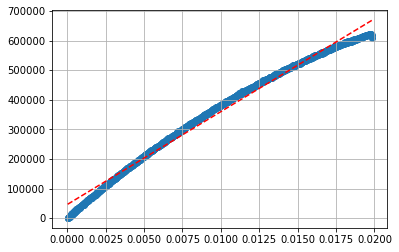

In [126]:
xnew = np.linspace((min(x)),(max(x)))
slope, intercept = np.polyfit(x,y,1)
f = xnew * slope + intercept

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(xnew,f,"r--")
ax.grid()
slope*1e-6

31.36728779445528

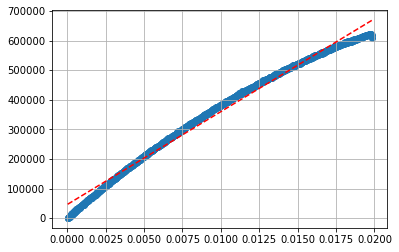

In [121]:
p = pd.read_excel('C:/Users/mathe/Documents/matheus/zebra/Equipe_DEV/teste2.xlsx')

x = p['Deformação']
y = p['Tensão']

xnew = np.linspace((min(x)),(max(x)))
slope, intercept = np.polyfit(x,y,1)
f = xnew * slope + intercept

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(xnew,f,"r--")
ax.grid()
slope*1e-6

In [125]:
#Este projeto visa saber o intervalo onde o grÃ¡fico deixa de ser uma reta
import pandas as pd   
# Criando um objeto da tabela do excel (s) e aderindo as colunas Ã s variÃ¡veis ''X'' e ''Y''
s = pd.read_excel('C:/Users/mathe/Documents/matheus/zebra/Equipe_DEV/Equipe-Devs/Estruturas/dados.xlsx')
X = (s['Deformação'])
Y = (s['Tensão']) 

var_reta=[]
coef_ang = []   
pontos= []

while True:
    for n in range(1,len(s)): 
        coef_ang.append(abs((Y[n]- Y[n-1])/(X[n]-X[n-1]))) 
        if n > 1:
            var_reta.append(coef_ang[n]-coef_ang[n-1])   
    if not 0.99*var_reta[n-1]>var_reta[n]>1.01*var_reta[n-1]:   
        pontos.append(X[n]) 
        pontos.append(Y[n]) 
        pontos.append(coef_ang[n])
        break   

print(pontos)

IndexError: list index out of range